# **Pandas class on 1st of October**

Data Analytics functions on Numpy

In [ ]:
# Create a NumPy array
data = np.array([10, 20, 30, 40, 50])

# Calculate statistics
mean_value = np.mean(data)
median_value = np.median(data)
min_value = np.min(data)
max_value = np.max(data)
#max()
#mode()

print("Mean:", mean_value)
print("Median:", median_value)
print(max_value)

Mean: 30.0
Median: 30.0
50


In [ ]:
import pandas as pd
import numpy as np
import sqlite3

In [ ]:
connect = sqlite3.connect("/content/Car_Database.db")
cursor = connect.cursor()

cursor.execute("Select name from sqlite_master where type='table'")
table_list = cursor.fetchall()

print(table_list)

[('Customers',), ('sqlite_sequence',), ('Models',), ('Customer_Ownership',), ('Dealer_Brand',), ('Car_Parts',), ('Manufacture_Plant',), ('Brands',), ('Dealers',), ('Car_Options',), ('Car_Vins',), ('custom_table',)]


In [ ]:
cursor.execute("select * from Customers;")
response = cursor.fetchall()
print(response)

[(1, 'Jeremy', 'Jacobs', 'Male', 120000, '1990-12-12', 9177554315, 'Jeremy@Gmail.com'), (2, 'Maria', 'Swabota', 'Female', 60000, '1980-06-15', 7577749387, 'Maria@Gmail.com'), (3, 'Jacob', 'Wong', 'Male', 24000, '1992-02-20', 2129990234, 'WonTon@hotmail.com'), (4, 'Pitbull', 'Perez', 'Male', 1200000, '1985-12-01', 7892341827, 'Pitbull@ymail.com'), (5, 'Minnie', 'Mouse', 'Female', 200000, '1950-03-01', 7542890987, 'MinnieMe@gmail.com'), (6, 'Jessica', 'Parker', 'Female', 120000, '1989-06-29', 4245679000, 'JennyFromThePark@mymail.com')]


**Working with Pandas on SQlite3**

In [ ]:
df = pd.read_sql_query("select * from Customers where gender='Male'",connect)
print(df)
print(type(df))

   customer_id first_name last_name gender  household_income   birthdate  \
0            1     Jeremy    Jacobs   Male            120000  1990-12-12   
1            3      Jacob      Wong   Male             24000  1992-02-20   
2            4    Pitbull     Perez   Male           1200000  1985-12-01   

   phone_number               email  
0    9177554315    Jeremy@Gmail.com  
1    2129990234  WonTon@hotmail.com  
2    7892341827   Pitbull@ymail.com  
<class 'pandas.core.frame.DataFrame'>


# **Working with CSV files**

In [ ]:
source = pd.read_csv("/content/sample_data/mnist_test.csv")

print(source.head(5))
print(source.tail(2))

   7  0  0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  ...  0.658  0.659  0.660  \
0  2  0    0    0    0    0    0    0    0    0  ...      0      0      0   
1  1  0    0    0    0    0    0    0    0    0  ...      0      0      0   
2  0  0    0    0    0    0    0    0    0    0  ...      0      0      0   
3  4  0    0    0    0    0    0    0    0    0  ...      0      0      0   
4  1  0    0    0    0    0    0    0    0    0  ...      0      0      0   

   0.661  0.662  0.663  0.664  0.665  0.666  0.667  
0      0      0      0      0      0      0      0  
1      0      0      0      0      0      0      0  
2      0      0      0      0      0      0      0  
3      0      0      0      0      0      0      0  
4      0      0      0      0      0      0      0  

[5 rows x 785 columns]
      7  0  0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  ...  0.658  0.659  0.660  \
9997  5  0    0    0    0    0    0    0    0    0  ...      0      0      0   
9998  6  0    0    0    0    0    0

In [ ]:
source.columns

<class 'pandas.core.indexes.base.Index'>


**How to store csv to sql**

In [ ]:
source.to_sql("custom_table",connect,if_exists="replace",index=False)

9999

**How to see schema of Table**

In [ ]:
df = pd.read_sql_query("PRAGMA table_info('custom_table')",connect)
print(df.head)
#print(type(df))

<bound method NDFrame.head of      cid   name     type  notnull dflt_value  pk
0      0      7  INTEGER        0       None   0
1      1      0  INTEGER        0       None   0
2      2    0.1  INTEGER        0       None   0
3      3    0.2  INTEGER        0       None   0
4      4    0.3  INTEGER        0       None   0
..   ...    ...      ...      ...        ...  ..
780  780  0.663  INTEGER        0       None   0
781  781  0.664  INTEGER        0       None   0
782  782  0.665  INTEGER        0       None   0
783  783  0.666  INTEGER        0       None   0
784  784  0.667  INTEGER        0       None   0

[785 rows x 6 columns]>


# **How to filter the data using Pandas**

In [ ]:
df = pd.DataFrame(
    {"name" : ["Name 1","Name 2","Name 3"],
     "age" : [ np.nan,67,6],
     "gender": ["Male", pd.NaT, "Female"],
     }
)

In [ ]:
df

,name,age,gender
0,Name 1,NaN,Male
1,Name 2,67.0,NaT
2,Name 3,6.0,Female


**dropna** which helps you to remove fields from your dataframes

In [ ]:
df.dropna()

,name,age,gender
2,Name 3,6.0,Female


In [ ]:
df.dropna(axis="columns")

,name
0,Name 1
1,Name 2
2,Name 3


In [ ]:
df.dropna(how="all")

,name,age,gender
0,Name 1,NaN,Male
1,Name 2,67.0,NaT
2,Name 3,6.0,Female


In [ ]:
df.dropna(subset=['age','gender'])

,name,age,gender
2,Name 3,6.0,Female


**Filtering values from CSV file now**

In [ ]:
df=pd.read_csv("/content/Diabetes Missing Data.csv")

data = df.dropna()

print(len(df))
print(len(data))
print("Deleted number of rows full null data",len(df)-len(data))

768
392
Deleted number of rows full null data 376


In [ ]:
df

,Pregnant,Glucose,Diastolic_BP,Skin_Fold,Serum_Insulin,BMI,Diabetes_Pedigree,Age,Class
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.0,180.0,32.9,0.171,63,0
764,2,122.0,70.0,27.0,NaN,36.8,0.340,27,0
765,5,121.0,72.0,23.0,112.0,26.2,0.245,30,0
766,1,126.0,60.0,NaN,NaN,30.1,0.349,47,1


In [ ]:
data  = df.replace(np.nan,"ZERO")
print(data)

     Pregnant Glucose Diastolic_BP Skin_Fold Serum_Insulin   BMI  \
0           6   148.0         72.0      35.0          ZERO  33.6   
1           1    85.0         66.0      29.0          ZERO  26.6   
2           8   183.0         64.0      ZERO          ZERO  23.3   
3           1    89.0         66.0      23.0          94.0  28.1   
4           0   137.0         40.0      35.0         168.0  43.1   
..        ...     ...          ...       ...           ...   ...   
763        10   101.0         76.0      48.0         180.0  32.9   
764         2   122.0         70.0      27.0          ZERO  36.8   
765         5   121.0         72.0      23.0         112.0  26.2   
766         1   126.0         60.0      ZERO          ZERO  30.1   
767         1    93.0         70.0      31.0          ZERO  30.4   

     Diabetes_Pedigree  Age  Class  
0                0.627   50      1  
1                0.351   31      0  
2                0.672   32      1  
3                0.167   21      0 

**Pivot**

In [ ]:
data = {
    'Month': ['Jan', 'Feb', 'Mar', 'Jan', 'Feb', 'Mar'],
    'Product': ['A', 'B', 'C', 'D', 'E', 'F'],
    'Sales': [100, 200, 300, 150, 250, 350]
    }

df = pd.DataFrame(data)

pivoted_df = df.pivot(index='Month', columns='Product', values='Sales')
print(pivoted_df)

Product      A      B      C      D      E      F
Month                                            
Feb        NaN  200.0    NaN    NaN  250.0    NaN
Jan      100.0    NaN    NaN  150.0    NaN    NaN
Mar        NaN    NaN  300.0    NaN    NaN  350.0


Merge function

In [ ]:
df1 = pd.DataFrame({'ID': ['A', 'B', 'C'], 'value': ["Name 1", "Name 2", "Name 3"]})
df2 = pd.DataFrame({'ID': ['A','D','B'], 'value2': ["dummy1", "dummy 2","dummy 4"]})

merged_df = pd.merge(df1,df2, on="ID", how='outer' )
print(merged_df)

  ID   value   value2
0  A  Name 1   dummy1
1  B  Name 2  dummy 4
2  C  Name 3      NaN
3  D     NaN  dummy 2


**Finding Unique values**

In [ ]:
unique_data = df['Age'].unique()
print(unique_data)

[50 31 32 21 33 30 26 29 53 54 34 57 59 51 27 41 43 22 38 60 28 45 35 46
 56 37 48 40 25 24 58 42 44 39 36 23 61 69 62 55 65 47 52 66 49 63 67 72
 81 64 70 68]


In [ ]:
df = pd.read_json("/content/sample_data/anscombe.json")
print(df)

   Series   X      Y
0       I  10   8.04
1       I   8   6.95
2       I  13   7.58
3       I   9   8.81
4       I  11   8.33
5       I  14   9.96
6       I   6   7.24
7       I   4   4.26
8       I  12  10.84
9       I   7   4.81
10      I   5   5.68
11     II  10   9.14
12     II   8   8.14
13     II  13   8.74
14     II   9   8.77
15     II  11   9.26
16     II  14   8.10
17     II   6   6.13
18     II   4   3.10
19     II  12   9.13
20     II   7   7.26
21     II   5   4.74
22    III  10   7.46
23    III   8   6.77
24    III  13  12.74
25    III   9   7.11
26    III  11   7.81
27    III  14   8.84
28    III   6   6.08
29    III   4   5.39
30    III  12   8.15
31    III   7   6.42
32    III   5   5.73
33     IV   8   6.58
34     IV   8   5.76
35     IV   8   7.71
36     IV   8   8.84
37     IV   8   8.47
38     IV   8   7.04
39     IV   8   5.25
40     IV  19  12.50
41     IV   8   5.56
42     IV   8   7.91
43     IV   8   6.89


# **To find null columns name 3 rd October**

In [ ]:
import numpy as np
import pandas as pd

#create Data frame to see columnd and rows containing null values
data = {
    'A' : [1,2,3,4,5],
    'B' : [6,7,8, np.nan,0],
    'C' : [1,2,3,4,5]
}
df = pd.DataFrame(data)

#get the columns which are having null values
null_columns_name = df.isnull().any()

print(null_columns_name)

A    False
B     True
C    False
dtype: bool


**Assignment: list all the column names which has at least one null value in Diabtest csv**

Groupby

In [ ]:
data = {'Student': ['Alice', 'Bob', 'Charlie', 'Alice', 'Bob'],
        'Subject': ['Math', 'Science', 'English', 'Math', 'Science'],
        'Grade': [85, 90, 75, 92, 88]}
df = pd.DataFrame(data)
df

,Student,Subject,Grade
0,Alice,Math,85
1,Bob,Science,90
2,Charlie,English,75
3,Alice,Math,92
4,Bob,Science,88


In [ ]:
grouped_df = df.groupby('Student')['Grade'].mean()

print(grouped_df)

Student
Alice      88.5
Bob        89.0
Charlie    75.0
Name: Grade, dtype: float64


In [ ]:
grouped_df = df.groupby('Subject')['Grade'].max()
print(grouped_df)

Subject
English    75
Math       92
Science    90
Name: Grade, dtype: int64


In [ ]:
df.to_json("grouped_studet_data.json")

In [ ]:
df.to_csv("grouped_student_data.csv", index=False)

# **Getting data from web (API)**

In [ ]:
import requests

url = "https://randomuser.me/api/?results=1"

response = requests.get(url)

if response.status_code == 200:
  data = response.json()
  user_data = data['results'][0]
  print(user_data['name']['first'])
  print(user_data['email'])
else:
  print("Url might be not correct")

Cleonice
cleonice.dacunha@example.com


Select column names, aggrefunction from tablename group by

# **4th Of October 2024**

In [1]:
import matplotlib.pyplot as plt
import numpy as np

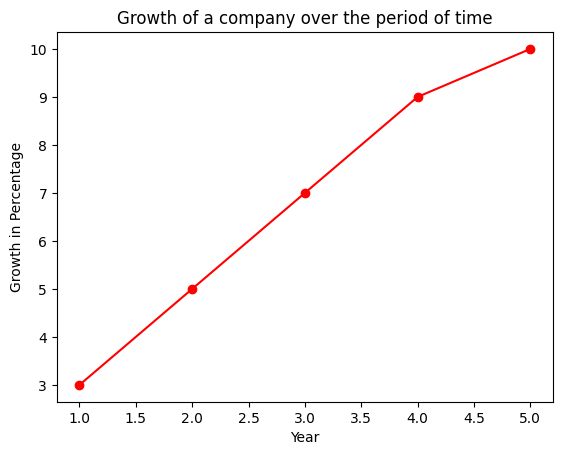

In [10]:
#line chart
x_points = np.array([1,2,3,4,5])
y_points = np.array([3,5,7,9,10])
plt.plot(x_points,y_points,marker="o",color="red")
plt.xlabel("Year")
plt.ylabel("Growth in Percentage")
plt.title("Growth of a company over the period of time")
#plt.grid(True)

plt.show()

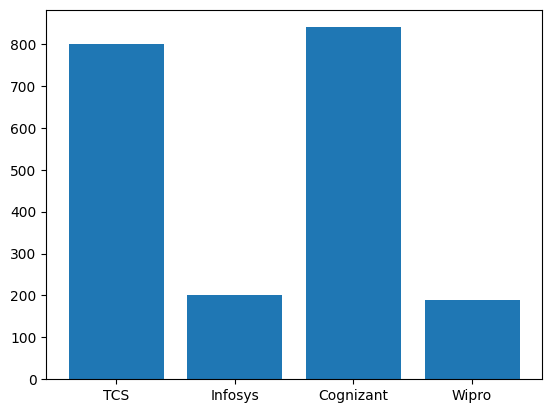

In [15]:
#barchart
x = np.array(["TCS","Infosys","Cognizant","Wipro"])
y = np.array([800,200,840,190])
plt.bar(x,y)
plt.show()

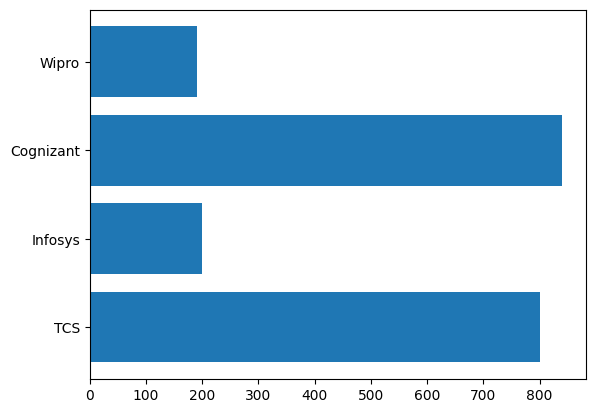

In [16]:
x = np.array(["TCS","Infosys","Cognizant","Wipro"])
y = np.array([800,200,840,190])
plt.barh(x,y)
plt.show()

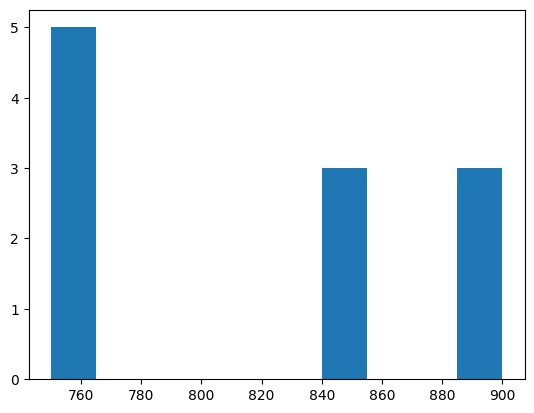

In [17]:
x= np.array([750,850,750,850,900,750,850,900,900,750,750])
plt.hist(x)

plt.show()

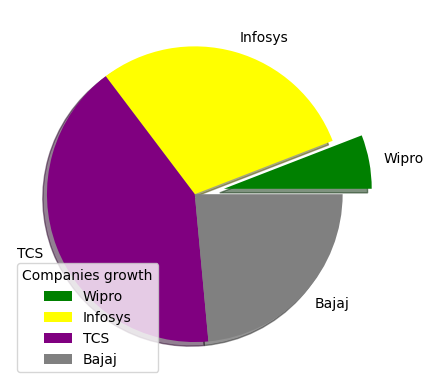

In [24]:
#piechart
x = np.array([5,25,35,20])
my_labels = ['Wipro',"Infosys","TCS","Bajaj"]
myexplode = [0.2,0,0,0]

my_colors = ["green","yellow","purple","grey"]
plt.pie(x,labels=my_labels, shadow=True, colors=my_colors, explode=myexplode)
plt.legend(title="Companies growth")
plt.show()